# Анализ факторов, влияющих на сахарный диабет

В данном проекте будет проведен анализ факторов, влияющих на развитие сахарного диабета. Цель состоит в выявлении значимых переменных и их группировке с помощью факторного анализа.

## Описание данных

1. **Diabetes_012**: Указывает на наличие диабета (0 - нет, 1 - да, 2 - преддиабет).
2. **HighBP**: Наличие гипертонии (0 - нет, 1 - да).
3. **HighChol**: Наличие высокого уровня холестерина (0 - нет, 1 - да).
4. **CholCheck**: Проведение проверки уровня холестерина (0 - нет, 1 - да).
5. **BMI**: Индекс массы тела, числовое значение.
6. **Smoker**: Статус курения (0 - не курит, 1 - курит).
7. **Stroke**: Наличие инсульта (0 - нет, 1 - да).
8. **HeartDiseaseorAttack**: Наличие сердечно-сосудистых заболеваний или инфаркта (0 - нет, 1 - да).
9. **PhysActivity**: Уровень физической активности (0 - нет, 1 - да).
10. **Fruits**: Употребление фруктов (0 - нет, 1 - да).
11. **Veggies**: Употребление овощей (0 - нет, 1 - да).
12. **HvyAlcoholConsump**: Употребление алкоголя в больших количествах (0 - нет, 1 - да).
13. **AnyHealthcare**: Доступ к медицинскому обслуживанию (0 - нет, 1 - да).
14. **NoDocbcCost**: Отсутствие стоимости посещения врача (0 - нет, 1 - да).
15. **GenHlth**: Общее состояние здоровья (числовая оценка от 1 до 5).
16. **MentHlth**: Оценка психического здоровья (числовая оценка).
17. **PhysHlth**: Оценка физического здоровья (числовая оценка).
18. **DiffWalk**: Проблемы с передвижением (0 - нет, 1 - да).
19. **Sex**: Пол (0 - женский, 1 - мужской).
20. **Age**: Возраст в числовом формате.
21. **Education**: Уровень образования (числовая оценка).
22. **Income**: Уровень дохода (числовая оценка).

## План проекта

1. Импорт библиотек
2. Загрузка данных
3. Предподготовка и предварительный анализ данных
4. Факторный анализ
5. Вывод

## Импорт библиотек

In [1]:
!pip install -q --upgrade kagglehub

In [2]:
import os
import kagglehub
import pandas as pd

#для работы с регулярными выражениями
import re

# Библиотеки визуализации
import seaborn as sns
from matplotlib import pyplot as plt

# Стандартизация данных
from sklearn.preprocessing import StandardScaler
# Факторный анализ
from statsmodels.multivariate.factor import Factor

## Загрузка данных

In [3]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print(os.listdir(path))

['diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']


In [4]:
df = pd.read_csv(f'{path}/diabetes_012_health_indicators_BRFSS2015.csv')

## Предобработка и предварительный анализ данных

### Предобработка данных:

In [5]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# переименование столбцов
df.columns = [re.sub('(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]

# проверка
df.columns

Index(['diabetes_012', 'high_b_p', 'high_chol', 'chol_check', 'b_m_i',
       'smoker', 'stroke', 'heart_diseaseor_attack', 'phys_activity', 'fruits',
       'veggies', 'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost',
       'gen_hlth', 'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age',
       'education', 'income'],
      dtype='object')

In [8]:
df.describe()

,diabetes_012,high_b_p,high_chol,chol_check,b_m_i,smoker,stroke,heart_diseaseor_attack,phys_activity,fruits,...,any_healthcare,no_docbc_cost,gen_hlth,ment_hlth,phys_hlth,diff_walk,sex,age,education,income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
# перевожу тип данных признаков в целочисленный
df = df.astype({'diabetes_012': 'int', 'high_b_p': 'int', 'high_chol': 'int',
                 'chol_check': 'int', 'b_m_i': 'int', 'smoker': 'int',
                 'stroke': 'int', 'heart_diseaseor_attack': 'int',
                 'phys_activity': 'int', 'fruits': 'int', 'veggies': 'int',
                 'hvy_alcohol_consump': 'int', 'any_healthcare': 'int',
                 'no_docbc_cost': 'int', 'gen_hlth': 'int',
                 'ment_hlth': 'int', 'phys_hlth': 'int',
                 'diff_walk': 'int', 'sex': 'int', 'age': 'int',
                 'education': 'int', 'income': 'int'})

### Предварительный анализ

In [10]:
def plot_feature_distribution(df, feature):
    # Подсчет количества значений для указанного столбца и сортировка по убыванию
    column_counts = df[feature].value_counts(dropna=False).sort_values(ascending=False)

    # Расчет процентного содержания
    total_count = len(df[feature])
    percentages = [(count / total_count) * 100 for count in column_counts]

    # Создание столбчатой диаграммы с процентами
    plt.figure(figsize=(12, 5))
    bars = plt.bar(column_counts.index.astype(str), column_counts, color='skyblue')

    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.0f}%', ha='center', va='bottom')

In [11]:
def calculate_percentage_distribution(category_col):
    """
    Функция для подсчета распределения значений и преобразования их в проценты.
    Возвращает процентное распределение значений для каждой категории.
    """
    # Группируем данные по указанным категориям
    # затем считаем размер каждой группы и преобразуем в таблицу
    count_df = df.groupby([category_col, 'diabetes_012']).size().unstack(fill_value=0)

    # Вычисляем процентное распределение для каждой категории
    percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

    return percent_df.round(0)

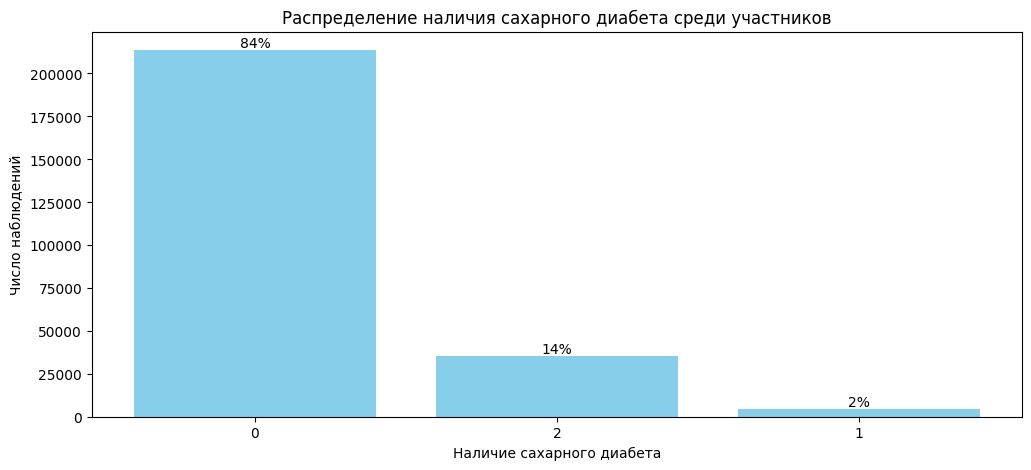

In [12]:
plot_feature_distribution(df, 'diabetes_012')

plt.xlabel('Наличие сахарного диабета')
plt.ylabel('Число наблюдений')
plt.title('Распределение наличия сахарного диабета среди участников')
plt.show()

Переменная, отвечающая за наличие у человека сахарного диабета, может принимать три значения: «диабет», «преддиабет» и «отсутствие диабета». В нашем наборе данных диабет обнаружен лишь в 2% случаев, а преддиабет — в 14%. Остальные переменные представляют собой личные данные пациентов, которые, возможно, связаны с развитием этого заболевания.

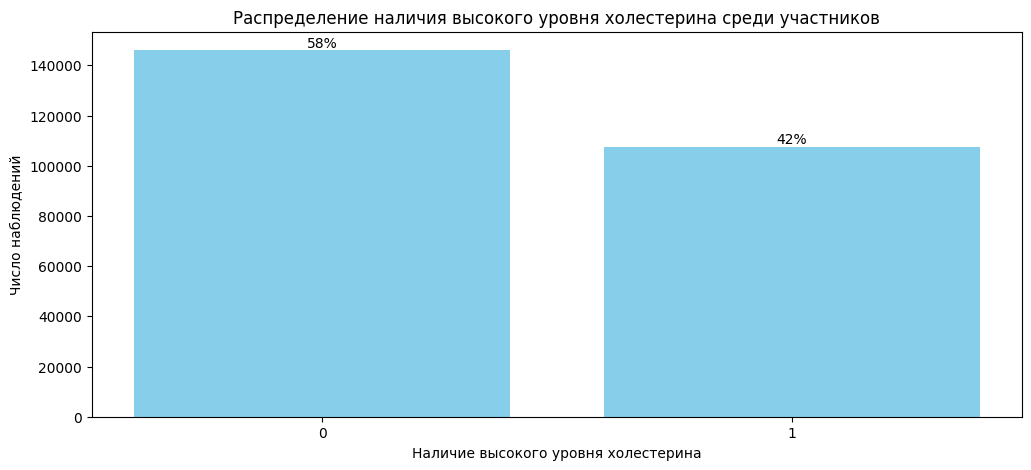

In [13]:
plot_feature_distribution(df, 'high_chol')

plt.xlabel('Наличие высокого уровня холестерина')
plt.ylabel('Число наблюдений')
plt.title('Распределение наличия высокого уровня холестерина среди участников')
plt.show()

In [14]:
# Подсчет распределения и преобразование в проценты
calculate_percentage_distribution('high_b_p')

diabetes_012,0,1,2
high_b_p,,,
0,93.0,1.0,6.0
1,73.0,3.0,24.0


В выборке люди с повышенным холестерином составляют 42%, а без него – 58%, распределение примерно одинаковое. По таблице соотношения признака с целевым видно, что наличие высокого уровня холестерина увеличивает вероятность развития сахарного диабета в 3 раза, преддиабета в 4.

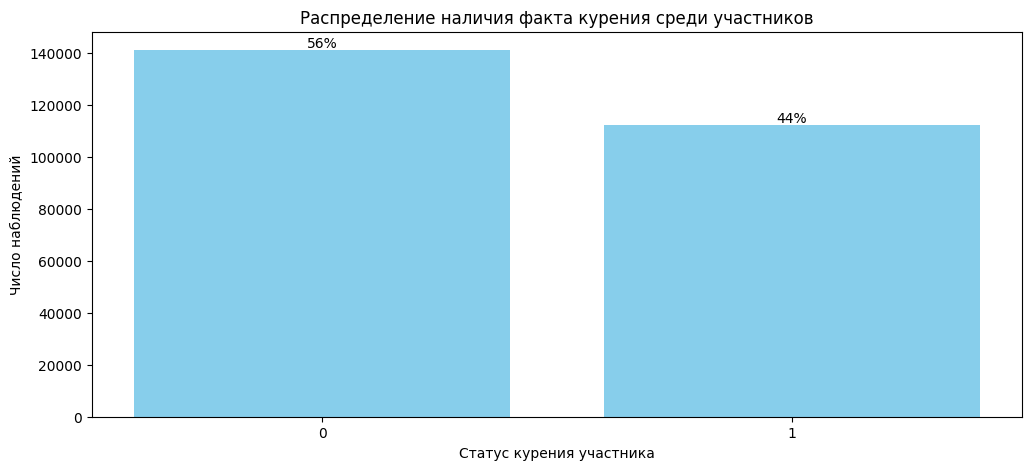

In [15]:
plot_feature_distribution(df, 'smoker')

plt.xlabel('Статус курения участника')
plt.ylabel('Число наблюдений')
plt.title('Распределение наличия факта курения среди участников')
plt.show()

In [16]:
# Подсчет распределения и преобразование в проценты
calculate_percentage_distribution('smoker')

diabetes_012,0,1,2
smoker,,,
0,86.0,2.0,12.0
1,82.0,2.0,16.0


В выборке курящие люди составляют 44%, а некурящие – 56%, распределение примерно одинаковое. По таблице соотношения признака с целевым видно, что значительной разницы между курящими и некурящими не наблюдается.

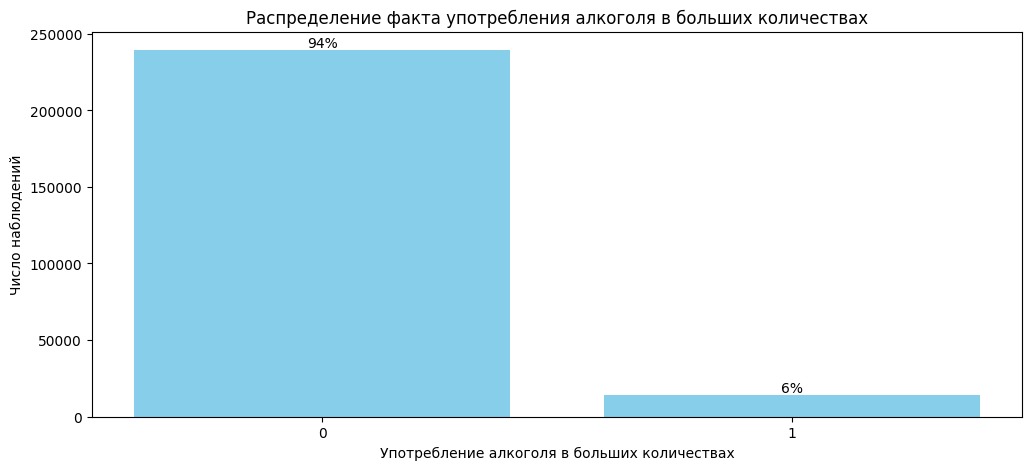

In [17]:
plot_feature_distribution(df, 'hvy_alcohol_consump')

plt.xlabel('Употребление алкоголя в больших количествах')
plt.ylabel('Число наблюдений')
plt.title('Распределение факта употребления алкоголя в больших количествах')
plt.show()

In [18]:
# Подсчет распределения и преобразование в проценты
calculate_percentage_distribution('hvy_alcohol_consump')

diabetes_012,0,1,2
hvy_alcohol_consump,,,
0,84.0,2.0,14.0
1,93.0,1.0,6.0


В выборке количество участников, употребляющих алкоголь в больших количествах, составляет 6%. У 2/3 из них отсутствует сахарный диабет, что не позволяет сделать достоверные выводы о взаимосвязи признаков.

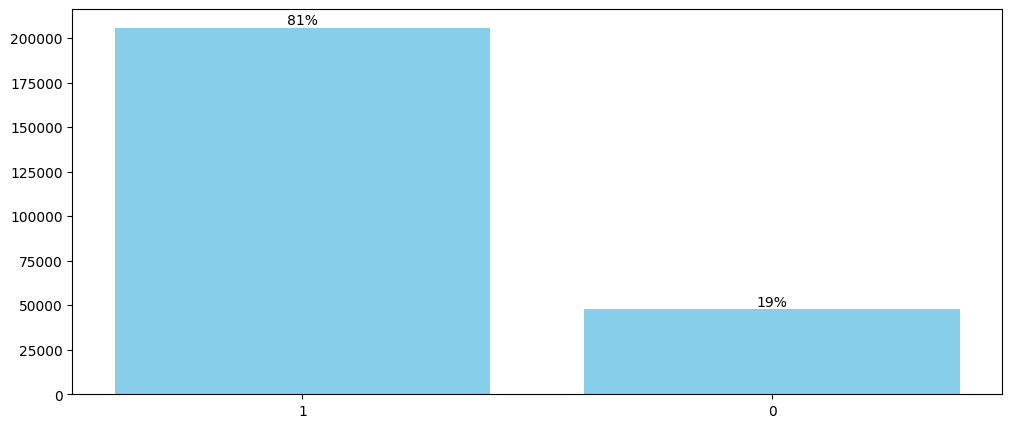

In [19]:
plot_feature_distribution(df, 'veggies')

In [20]:
# Подсчет распределения и преобразование в проценты
calculate_percentage_distribution('veggies')

diabetes_012,0,1,2
veggies,,,
0,80.0,2.0,18.0
1,85.0,2.0,13.0


В выборке количество участников, употребляющих овощи, составляет 81%. Связи с наличием диабета не обнаружено.

### Подготовка данных к факторному анализу

In [21]:
df = df.drop(columns={'diabetes_012'})

У разных переменных разные шкалы. Это может снизить точность результатов факторного анализа. Необходимо привести переменные к стандартизированным значениям.

In [22]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [23]:
df.head()

,high_b_p,high_chol,chol_check,b_m_i,smoker,stroke,heart_diseaseor_attack,phys_activity,fruits,veggies,...,any_healthcare,no_docbc_cost,gen_hlth,ment_hlth,phys_hlth,diff_walk,sex,age,education,income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


Вывод по подготовке данных

Предобработка данных:
- Переименование столбцов выполнено в соответствии с PEP8.
- Признаки переведены в целочисленный тип данных.

Предварительный анализ:
- Переменная, отражающая наличие сахарного диабета, может принимать три значения: «диабет», «преддиабет» и «отсутствие диабета». В наборе данных диабет выявлен лишь в 2% случаев, а преддиабет — в 14%. Остальные переменные содержат личные данные пациентов, которые могут быть связаны с развитием заболевания.
- В выборке люди с повышенным холестерином составляют 42%, а без него – 58%, распределение примерно одинаковое. По таблице соотношения признака с целевым видно, что наличие высокого уровня холестерина увеличивает вероятность развития сахарного диабета в 3 раза, а преддиабета в 4 раза.
- В выборке курящие люди составляют 44%, а некурящие – 56%, распределение примерно одинаковое. По таблице соотношения признака с целевым видно, что значительной разницы между курящими и некурящими не наблюдается.
- В выборке количество участников, употребляющих алкоголь в больших количествах, составляет 6%. У 2/3 из них отсутствует сахарный диабет, что не позволяет сделать достоверные выводы о взаимосвязи признаков.
- В выборке количество участников, употребляющих овощи, составляет 81%. Связи с наличием диабета не обнаружено.

Подготовка данных к факторному анализу:
- Разные переменные имеют различные шкалы, что может снизить точность результатов факторного анализа. Переменные приведены к стандартизированным значениям с помощью StandardScaler(). Удалена целевая переменная.



## Факторный анализ

 Вычисляем связь между переменными и факторами с помощью метода Factor. Мы начнем с трех случайных факторов, чтобы затем уточнить и найти оптимальный вариант.

In [24]:
fa = Factor(df, n_factor=3, method='pa')
res = fa.fit()

In [25]:
'''
Таблица факторных нагрузок, которая показывает корреляцию между факторами и переменными.
Выделим значения, которые больше 0.3 или меньше -0.3, так как они считаются значительными.
'''
res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1,factor 2
gen_hlth,-0.734968,-0.045440,0.111437
phys_hlth,-0.629347,-0.120364,0.382027
diff_walk,-0.623351,0.012111,0.183879
income,0.549462,0.201507,0.240853
education,0.433767,0.146716,0.377492
high_b_p,-0.424675,0.360044,-0.101662
phys_activity,0.371571,0.066117,0.082131
ment_hlth,-0.367276,-0.271812,0.210885
heart_diseaseor_attack,-0.344495,0.219156,-0.003527
b_m_i,-0.264245,-0.018879,-0.016230


- **factor 0** включает в себя вопросы, связанные с различными аспектами здоровья, дохода и образования. Этот фактор можно объединить и назвать «Уровень жизни».
- **factor 1** состоит из вопросов о возрасте, уровне холестерина и доступности медицинской помощи. Вероятно, этот фактор связан с возрастными изменениями, так как уровень холестерина повышается с возрастом, а доступность медицинской помощи становится более важной с течением времени. Этот фактор можно объединить и назвать «Возрастные изменения».
- **factor 2** включает вопросы о наличии в рационе овощей и фруктов. Этот фактор является слабым, так как все значения не укладываются в диапазон от -0,3 до 0,3. Кроме того, этот фактор связан с полом, образованием и физическим здоровьем, что указывает на связь с питанием.

В ходе анализа были определены три основных фактора: уровень жизни, возрастные изменения и питание.

Для проверки количества выбранных факторов следует применить метод «локтя».

**Выбор числа факторов**

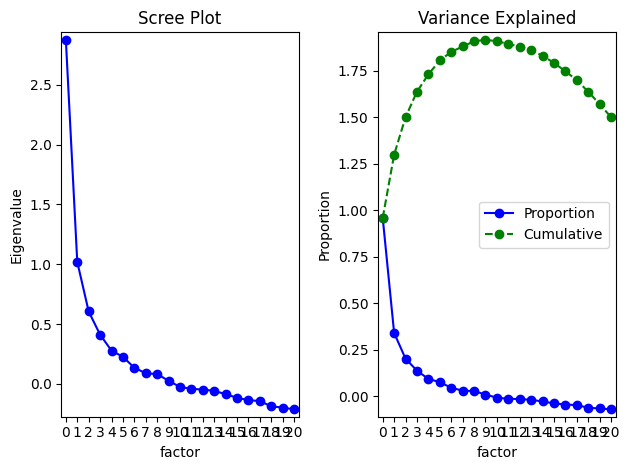

In [26]:
# создание графика
res.plot_scree()
plt.show()

Первые два фактора будут наиболее значимыми, так как они объясняют наибольшую долю дисперсии.

**Факторный анализ альтернативного варианта**

In [27]:
fa = Factor(df, n_factor=2, method='pa')
res = fa.fit()
res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1
gen_hlth,-0.740312,-0.059907
diff_walk,-0.620151,-0.000148
phys_hlth,-0.593052,-0.113399
income,0.539234,0.195881
high_b_p,-0.430033,0.350579
education,0.412842,0.130506
phys_activity,0.374019,0.072840
ment_hlth,-0.362109,-0.269409
heart_diseaseor_attack,-0.349662,0.214809
high_chol,-0.307361,0.304695


Сохраняются два первых фактора, которые ранее были условно обозначены как «уровень жизни» и «возрастные изменения».

## Вывод

В ходе анализа были выявлены два аспекта, которые могут быть потенциально связаны с сахарным диабетом. Условно их можно обозначить как «уровень жизни» и «возрастные изменения».

Аспекты находятся в оптимальном балансе.

Таким образом, можно сделать вывод, что аспекты, потенциально связанные с сахарным диабетом, можно разделить на две категории: связанные с уровнем жизни и связанные с возрастными изменениями.

Важно отметить, что не утверждается, что какой-либо из этих аспектов является прямой причиной сахарного диабета.